In [2]:
# pip install adtk seaborn matplotlib pandas yfinance

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import (
    ThresholdAD, QuantileAD, InterQuartileRangeAD, 
    GeneralizedESDTestAD, PersistAD, VolatilityShiftAD
)

Anomaly Detection Toolkit (ADTK) – Outil de Détection d'Anomalies
Anomaly Detection Toolkit (ADTK) est une bibliothèque Python conçue pour la détection d’anomalies dans les séries temporelles, en utilisant des approches non supervisées ou basées sur des règles.

La nature des anomalies varie selon les cas, ce qui signifie qu’un seul modèle ne peut pas convenir à toutes les situations. La clé du succès dans la détection d’anomalies repose sur le choix et la combinaison de trois éléments :

Les algorithmes de détection (detectors),
Les méthodes d’ingénierie des caractéristiques (transformers),
Les méthodes d’agrégation (aggregators).
Cette bibliothèque propose un ensemble de détecteurs, de transformateurs et d'agrégateurs avec des APIs unifiées, ainsi que des classes de pipeline permettant de les connecter pour former un modèle complet. Elle inclut également plusieurs fonctions de traitement et de visualisation des séries temporelles et des événements anormaux.

 En résumé : ADTK facilite la détection des anomalies dans les séries temporelles grâce à une approche modulaire et flexible.

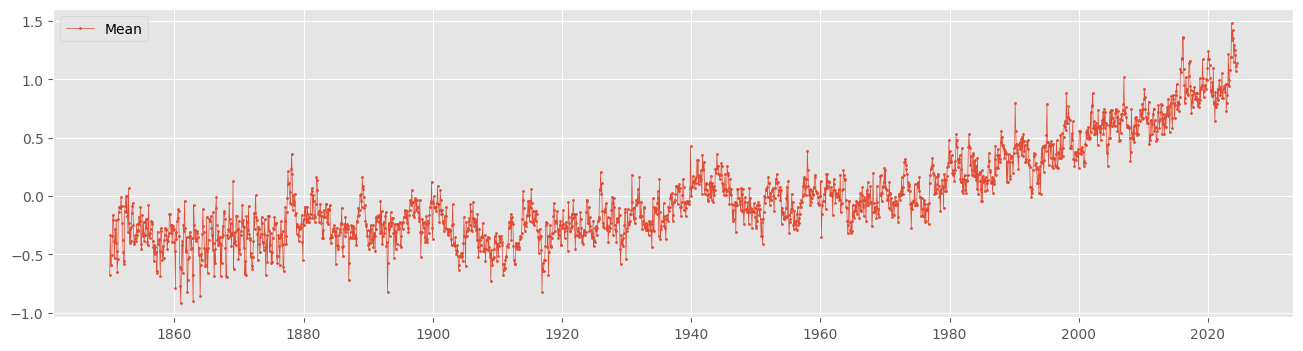

In [4]:


# 🔹 Fix: Override Matplotlib Style
plt.style.use("ggplot")  # Use ggplot instead of seaborn-whitegrid

# 🔹 Step 1: Load CSV and clean column names
df = pd.read_csv("temperature.csv")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df = df[["Year", "Mean"]]  # Keep only required columns

# 🔹 Step 2: Convert "Year" column to datetime and set as index
df["Year"] = pd.to_datetime(df["Year"], format="%Y-%m")
df = df.set_index("Year")

# 🔹 Step 3: Select "Mean" column for time-series analysis
s_train = df["Mean"]

# 🔹 Step 4: Validate the time series format
s_train = validate_series(s_train)

# 🔹 Step 5: Plot the original data
plot(s_train)
plt.show()

# 📌 Détection d’Anomalies : Seuils et Quantiles

On commence deux méthodes classiques de **détection d’anomalies** en utilisant la bibliothèque **ADTK (Anomaly Detection Toolkit)** :  
- **Détection par seuils fixes** (`ThresholdAD`)  
- **Détection par quantiles statistiques** (`QuantileAD`)  

Ces approches permettent d’identifier les valeurs extrêmes dans une série temporelle en fonction de critères prédéfinis.

---

## 🔹 **1. Détection d’Anomalies Basée sur des Seuils (Threshold Anomaly Detection)**

Le prochain bloc de code met en œuvre une **détection d’anomalies basée sur des seuils fixes** à l’aide de la classe `ThresholdAD` du module **ADTK**.  
Cette méthode identifie les valeurs anormales en définissant **un seuil maximum (`high=0.75`) et un seuil minimum (`low=-0.5`)**.

### **📌 Principe de la Détection par Seuils :**
Le détecteur `ThresholdAD` compare chaque valeur de la série temporelle `s_train` à ces seuils :
- **Si une valeur dépasse `0.75`**, elle est considérée comme une **anomalie positive**.
- **Si une valeur est inférieure à `-0.5`**, elle est considérée comme une **anomalie négative**.

Une fois la détection effectuée via la méthode `.detect(s_train)`, le résultat (`anomalies`) est utilisé pour **visualiser les points anormaux** sur la courbe de la série temporelle grâce à la fonction `plot()`.

- **Les anomalies sont affichées en rouge** (`anomaly_color="red"`).
- **Elles sont marquées sur la courbe** (`anomaly_tag="marker"`).
- `plt.show()` est appelé pour **afficher le graphique**, permettant d’analyser visuellement les anomalies identifiées.

### ✅ **Avantages :**
✔ **Méthode simple et rapide**, facile à implémenter.  
✔ Fonctionne bien lorsque les **seuils sont bien définis** à l’avance.  
✔ Permet une **détection instantanée** des anomalies sans apprentissage.  

### ⚠ **Inconvénients :**
❌ **Ne s’adapte pas automatiquement** aux variations des données.  
❌ **Dépend fortement des valeurs choisies** pour `high` et `low`.  
❌ **Ne prend pas en compte la distribution des données**, ce qui peut entraîner des **faux positifs ou négatifs**.  

---



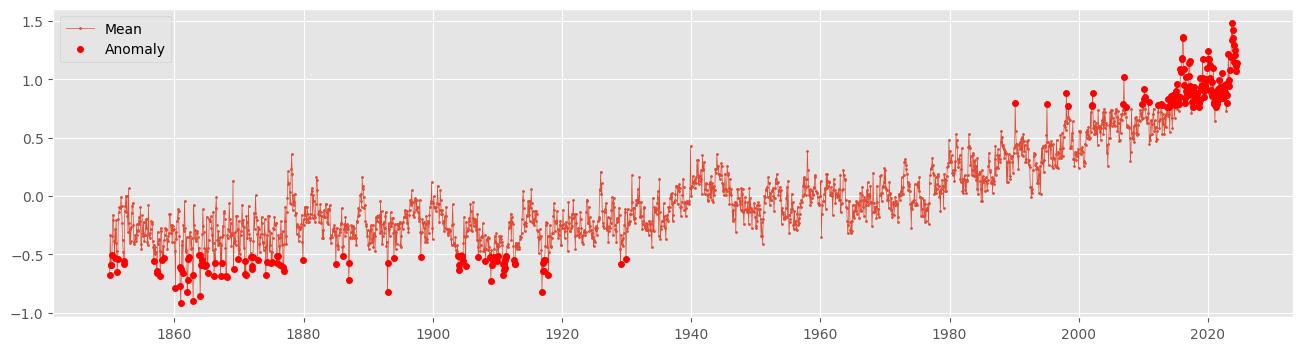

In [3]:
# =============================
# 🔹 Threshold Anomaly Detection
# =============================
threshold_ad = ThresholdAD(high=0.75, low=-0.5)
anomalies = threshold_ad.detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

# 📌 Quantile Anomaly Detection

Le prochain bloc de code met en œuvre une **détection d’anomalies basée sur les quantiles** à l’aide de la classe `QuantileAD` du module **ADTK**. Contrairement à la méthode des seuils fixes, cette approche identifie les anomalies en fonction des **quantiles statistiques** des données.

---

## 🔹 **.2 Détection d’Anomalies Basée sur les Quantiles (Quantile Anomaly Detection)**

Le prochain bloc de code met en œuvre une **détection d’anomalies basée sur les quantiles** à l’aide de la classe `QuantileAD` du module **ADTK**. Contrairement à la méthode des seuils fixes, cette approche identifie les anomalies en fonction des **quantiles statistiques** des données.

### **📌 Principe de la Détection par Quantiles :**
- **`high=0.99`** → Toute valeur située au-delà du **99ᵉ centile** est considérée comme une **anomalie**.  
- **`low=0.01`** → Toute valeur en dessous du **1ᵉʳ centile** est également considérée comme une **anomalie**.  

L’utilisation de `.fit_detect(s_train)` signifie que le détecteur va **calculer automatiquement** les valeurs de seuil à partir de la distribution des données de `s_train`, puis appliquer la détection d’anomalies.

Une fois les anomalies détectées (`anomalies`), elles sont visualisées sur le graphique avec la fonction `plot()`, où :

- **Les anomalies sont affichées en rouge** (`anomaly_color="red"`).
- **Elles sont marquées sur la courbe** (`anomaly_tag="marker"`).
- `plt.show()` permet **d’afficher le graphique**, facilitant l’analyse visuelle des anomalies extrêmes dans la série temporelle.

### ✅ **Avantages :**
✔ **Méthode non paramétrique**, s’adapte automatiquement à la distribution des données.  
✔ **Idéale pour les séries temporelles avec de nombreuses valeurs extrêmes**.  
✔ **Simple à mettre en œuvre** et fonctionne bien lorsque la distribution des données est bien définie.  
✔ Permet **de filtrer les anomalies sans connaissance préalable des seuils absolus**.  

### ⚠ **Inconvénients :**
❌ **Dépend fortement de la distribution des données**, ce qui peut entraîner des **faux positifs ou négatifs** si la distribution est biaisée.  
❌ **Ne tient pas compte du contexte temporel**, une valeur extrême peut être normale selon la saison ou la tendance.  
❌ **Sensibilité au choix des quantiles (`high` et `low`)**, un mauvais réglage peut fausser la détection.  
❌ Moins efficace sur **des séries très bruitées** où il y a beaucoup de variations rapides.  

---

## 🚀 **Conclusion**
- **ThresholdAD** est utile si **vous connaissez bien vos seuils**, mais il ne s’adapte pas aux changements de distribution.  
- **QuantileAD** est **plus flexible**, mais nécessite une **bonne compréhension de la distribution** des données.  
- Pour des séries **fortement dynamiques**, d’autres méthodes comme **IQR ou ESD** peuvent être plus adaptées.  

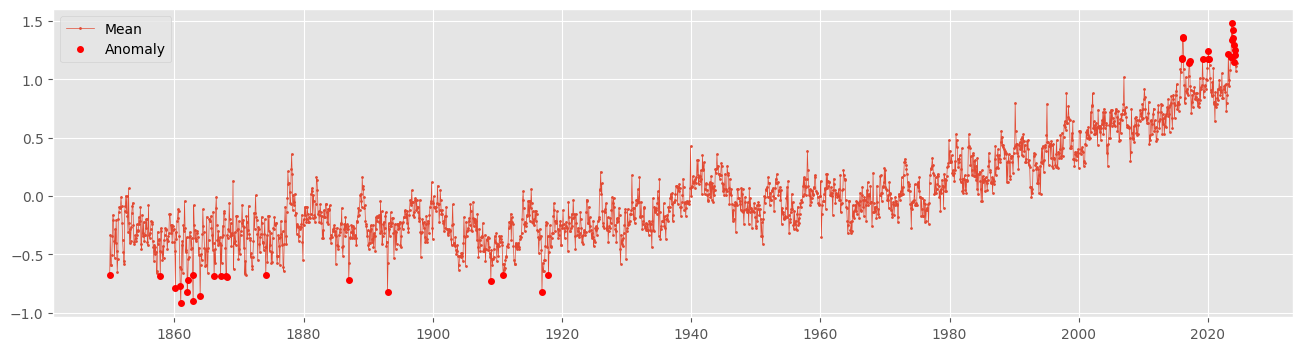

In [4]:

# =============================
# 🔹 Quantile Anomaly Detection
# =============================
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


#  Détection d’Anomalies basée sur l’Intervalle Interquartile (IQR)

Le prochain bloc de code met en œuvre une **détection d’anomalies basée sur l’intervalle interquartile (IQR)** en utilisant la classe `InterQuartileRangeAD` du module **ADTK**.  
Cette méthode est basée sur la dispersion des données et permet d’identifier les valeurs **considérablement éloignées** de la distribution centrale.

## 🔹 Principe de l’Inter Quartile Range (IQR) :
L’**IQR** est défini comme la **différence entre le troisième quartile (Q3) et le premier quartile (Q1)** :  
\[
IQR = Q3 - Q1
\]
- Toute valeur qui dépasse **Q3 + c × IQR** ou qui est en dessous de **Q1 - c × IQR** est considérée comme une anomalie.  
- **Ici, `c=1.5`** signifie que l'on utilise un seuil **1,5 fois l’intervalle interquartile** pour déterminer les valeurs extrêmes.

## 🔹 Avantages et Inconvénients
### ✅ **Avantages :**
✔ Méthode robuste aux valeurs aberrantes modérées car elle repose sur une dispersion statistique.

✔ Aucune hypothèse sur la distribution des données, contrairement au Test ESD qui suppose une normalité.

✔ Facile à interpréter et implémenter avec un seul paramètre c ajustable.

✔ Fonctionne bien sur des données stationnaires sans grandes variations de tendance.

### ⚠ **Inconvénients :**
❌ Moins efficace sur les séries temporelles avec des tendances fortes, car l’IQR ne prend pas en compte l’évolution temporelle.

❌ Ne détecte pas toujours les anomalies contextuelles, car il ne considère pas la corrélation temporelle.

❌ Sensibilité au choix du facteur c, un mauvais réglage peut entraîner trop ou trop peu d’anomalies détectées.

❌ Moins performant pour les petits ensembles de données, car les quartiles peuvent être instables sur un échantillon réduit.


**🚀 Cette méthode est idéale pour détecter des valeurs extrêmes dans des distributions homogènes, mais elle doit être utilisée avec prudence sur des séries temporelles présentant des tendances marquées.**


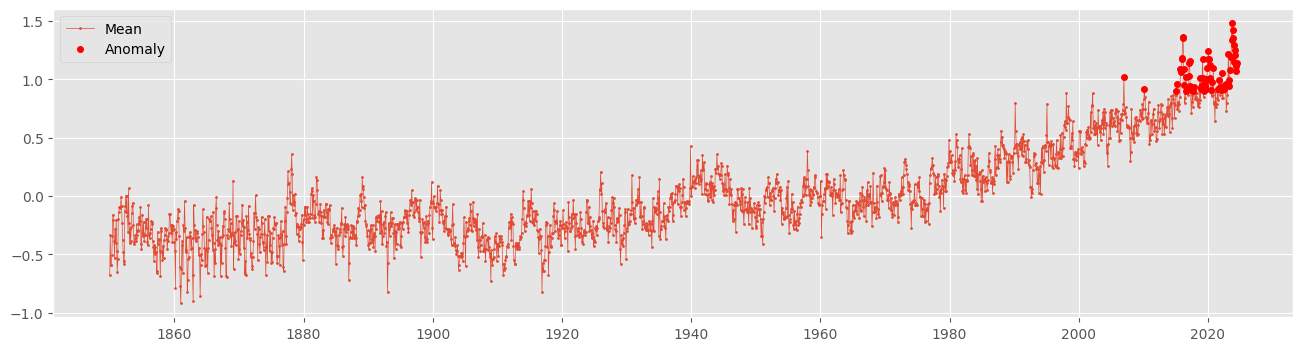

In [5]:

# =========================================
# 🔹 Inter Quartile Range Anomaly Detection
# =========================================
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


# 📌 Détection d’Anomalies avec le **Generalized Extreme Studentized Deviate (ESD) Test**

Ce bloc de code met en œuvre une **détection d’anomalies basée sur le test ESD généralisé** (**Generalized Extreme Studentized Deviate Test**), à l’aide de la classe `GeneralizedESDTestAD` du module **ADTK**.  
Ce test est particulièrement efficace pour identifier **des valeurs extrêmes dans une distribution normale**.

---

## 🔹 Principe du **Generalized ESD Test** :
Le test **ESD généralisé** est une méthode statistique utilisée pour **détecter des valeurs aberrantes** dans un jeu de données en supposant que les valeurs suivent **une distribution normale**.

1. **Calcul du score de Student (Z-score) :**  
   Pour chaque point, on calcule son **degré d’éloignement** par rapport à la moyenne en fonction de l’écart-type.

2. **Détection des anomalies :**  
   - On identifie les valeurs ayant un **Z-score trop élevé**.
   - On les retire progressivement en recalculant la moyenne et l'écart-type à chaque étape.
   - On applique un **seuil statistique basé sur l’alpha**.

3. **Interprétation du paramètre `alpha` :**  
   - **`alpha=0.3`** signifie que l'on accepte une **probabilité de 30% de faux positifs**.
   - Plus `alpha` est petit, plus le modèle sera strict dans la détection des anomalies.

---

## 🔹 Avantages et Inconvénients

### ✅ **Avantages :**
✔ Très efficace pour **détecter des valeurs extrêmes** dans une série temporelle.  
✔ Approche **statistiquement fondée**, permettant une détection fiable des anomalies.  
✔ Adapté aux jeux de données **de taille modérée à grande**.  
✔ Permet **un contrôle fin de la sensibilité** grâce au paramètre `alpha`.  

### ⚠ **Inconvénients :**
❌ Suppose que les données suivent une **distribution normale**, ce qui peut ne pas être toujours le cas.  
❌ Sensible aux **données fortement asymétriques ou bruitées**.  
❌ Peut **négliger certaines anomalies** si elles ne sont pas considérées comme statistiquement significatives.  
❌ Le choix de `alpha` peut **influencer fortement les résultats** et nécessite des ajustements expérimentaux.  

---

 **Cette méthode est particulièrement utile pour détecter des valeurs extrêmes dans des séries temporelles supposées normales, mais elle doit être utilisée avec prudence lorsque les données présentent des distributions non gaussiennes.** 


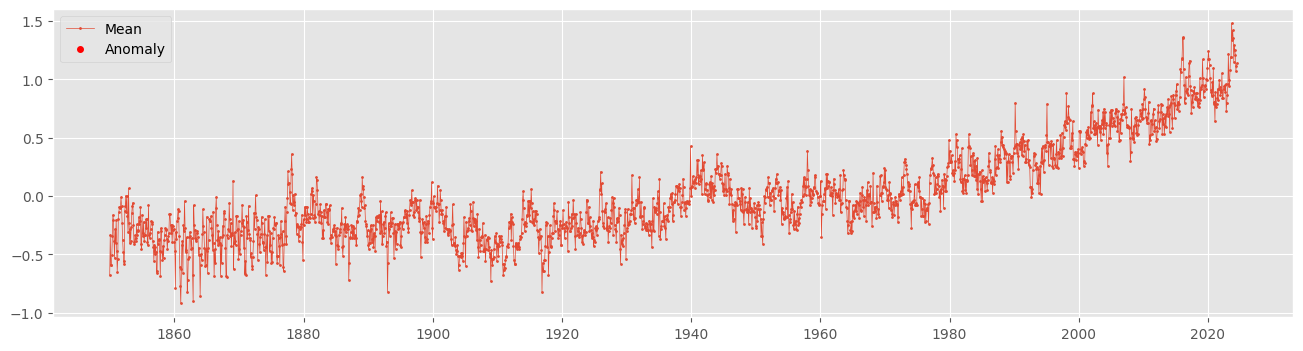

In [8]:
# ============================================
# 🔹 Generalized Extreme Studentized Deviate (ESD) Test
# ============================================
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


---

## 🔹 **. Détection d’Anomalies Persistantes (Persist Anomaly Detection - Positive)**

Le prochain bloc de code met en œuvre une **détection d’anomalies basée sur la persistance** à l’aide de la classe `PersistAD` du module **ADTK**.  
Cette méthode identifie les **changements soudains et persistants** dans une série temporelle.

### **📌 Principe de la Détection Persistante :**
- Compare chaque valeur aux **24 dernières valeurs (`window=24`)**.
- Une valeur est considérée comme **anormale si elle augmente brusquement** et dépasse **`c=3.0`** fois l’écart-type.
- `side='positive'` signifie que **seules les hausses anormales sont détectées**.

### ✅ **Avantages :**
✔ **Très utile pour détecter des tendances inhabituelles**.  
✔ **Prend en compte les tendances récentes**, ce qui réduit les faux positifs liés aux fluctuations normales.  
✔ **Convient aux séries temporelles où les anomalies ne sont pas seulement des valeurs extrêmes, mais aussi des changements de tendance**.  

### ⚠ **Inconvénients :**
❌ **Nécessite un bon réglage de `c` et `window`**, sinon il peut manquer certaines anomalies ou générer trop de faux positifs.  
❌ **Moins adapté aux séries temporelles très bruitées**, où des fluctuations normales peuvent être détectées à tort comme des anomalies.  
❌ **Ne détecte que les anomalies positives**, il faudra un autre modèle pour les baisses anormales (`side='negative'`).  

---

## 📌 Comparaison des Méthodes

| **Méthode**      | **Approche**                               | **Avantages** | **Inconvénients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d’apprentissage | Dépend fortement des seuils choisis, statique |
| **QuantileAD**   | Détection basée sur les quantiles (`0.99`, `0.01`) | S’adapte aux données, évite le choix manuel des seuils | Peut être inefficace si la distribution est irrégulière |
| **PersistAD**    | Comparaison avec les valeurs précédentes (`c=3.0`, `window=24`) | Capable de détecter des tendances anormales | Sensible au bruit, nécessite un bon réglage des paramètres |

---

## 🚀 **Conclusion**
- **ThresholdAD** est utile si **vous connaissez bien vos seuils**, mais il ne s’adapte pas aux changements de distribution.  
- **QuantileAD** est **plus flexible**, mais nécessite une **bonne compréhension de la distribution** des données.  
- **PersistAD** est idéal pour détecter **des tendances anormales** mais doit être bien paramétré (`c`, `window`).  


E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().

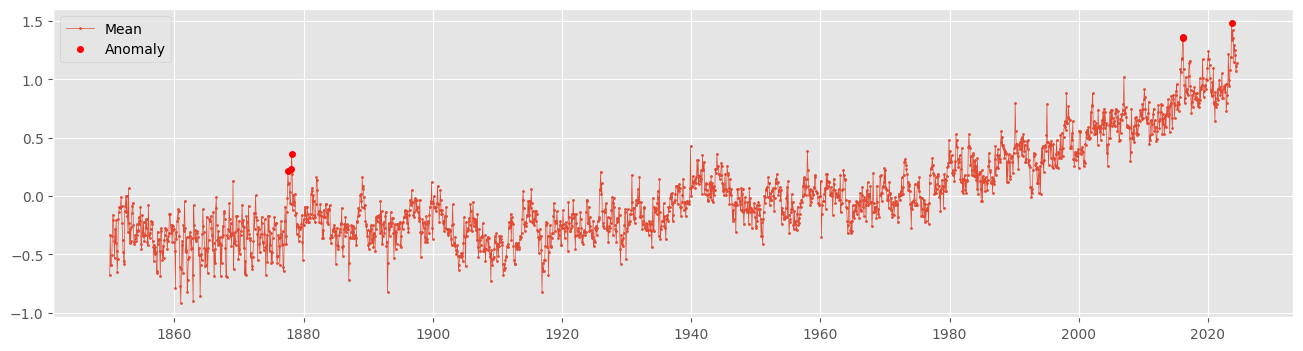

In [10]:

# ==================================
# 🔹 Persist Anomaly Detection (Positive)
# ==================================
persist_ad = PersistAD(c=3.0, side='positive', window=24)
anomalies = persist_ad.fit_detect(s_train)
#plot(s_train, anomaly=anomalies, anomaly_color="red")
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

---

## 🔹 **. Détection d’Anomalies Persistantes Négatives (Persist Anomaly Detection - Negative)**

Ce bloc de code met en œuvre une **détection d’anomalies basée sur la persistance des baisses soudaines** avec `PersistAD`.

### **📌 Principe :**
- Analyse les valeurs **par rapport aux 24 précédentes (`window=24`)**.
- Une baisse **forte et persistante** est considérée comme une **anomalie si elle est `1.5` fois plus faible que la moyenne mobile**.
- **`side='negative'`** signifie que **seules les baisses anormales sont détectées**.

### ✅ **Avantages :**
✔ **Idéal pour repérer des dégradations soudaines** (ex : baisse brutale d’un indicateur).  
✔ **Tient compte des tendances récentes**, contrairement aux méthodes purement statistiques.  
✔ **Réglable facilement via `c` et `window`** pour s’adapter à différentes données.  

### ⚠ **Inconvénients :**
❌ **Risque de détecter des baisses normales comme anomalies** si `c` est mal réglé.  
❌ **Moins efficace sur des séries très volatiles**, car les variations naturelles peuvent être considérées comme anormales.  
❌ **Ne détecte que les baisses**, un autre modèle doit être utilisé pour les hausses (`side='positive'`).  

---

## 📌 Comparaison des Méthodes

| **Méthode**      | **Approche**                               | **Avantages** | **Inconvénients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d’apprentissage | Dépend fortement des seuils choisis, statique |
| **QuantileAD**   | Détection basée sur les quantiles (`0.99`, `0.01`) | S’adapte aux données, évite le choix manuel des seuils | Peut être inefficace si la distribution est irrégulière |
| **PersistAD (+)** | Détecte les hausses soudaines (`c=3.0`) | Capable de détecter des tendances anormales | Sensible au bruit, nécessite un bon réglage des paramètres |
| **PersistAD (-)** | Détecte les baisses soudaines (`c=1.5`) | Utile pour surveiller des dégradations | Peut générer des faux positifs sur des séries volatiles |

---

## 🚀 **Conclusion**
- **ThresholdAD** fonctionne bien si les seuils sont bien définis.  
- **QuantileAD** est plus flexible mais dépend de la distribution des données.  
- **PersistAD (Positive & Negative)** est idéal pour détecter des **tendances anormales**, mais doit être bien paramétré.  

📌 **Prochaine étape : Expérimenter ces méthodes sur différentes séries temporelles !** 🎯

E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().

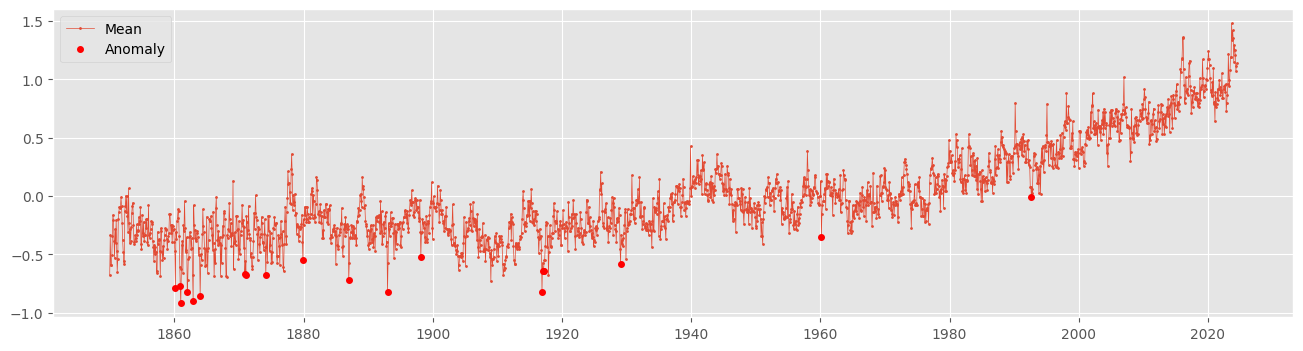

In [11]:
# ==================================
# 🔹 Persist Anomaly Detection (Negative)
# ==================================
persist_ad = PersistAD(c=1.5, side='negative', window=24)
anomalies = persist_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

---

## 🔹 **5. Détection d’Anomalies Basée sur les Changements de Volatilité (Volatility Shift Anomaly Detection)**

Ce bloc de code met en œuvre une **détection des anomalies liées aux variations soudaines de volatilité** à l’aide de `VolatilityShiftAD`.  
Les données utilisées sont récupérées depuis **Yahoo Finance** pour le titre **Tesla (TSLA)**.

### **📌 Principe :**
- L’algorithme détecte les périodes où **la volatilité change brusquement** par rapport aux 30 périodes précédentes (`window=30`).
- Une **hausse significative de la volatilité** est signalée si elle dépasse **`c=6.0`** fois l’écart-type.
- **`side='positive'`** signifie que **seules les hausses anormales de volatilité sont détectées**.

### ✅ **Avantages :**
✔ **Idéal pour l’analyse des marchés financiers**, où les fluctuations anormales de prix peuvent signaler des événements majeurs.  
✔ **Détecte les changements de volatilité et non juste des valeurs extrêmes**, ce qui peut être plus pertinent dans certains contextes.  
✔ **Applicable aux séries temporelles où une augmentation soudaine de la variation est un signe d’anomalie** (ex : capteurs industriels, trafic réseau, bourse).  

### ⚠ **Inconvénients :**
❌ **Nécessite des données suffisamment longues** pour bien capter les changements de volatilité.  
❌ **Peut être inefficace sur des séries peu volatiles**, où les changements sont rares.  
❌ **Dépend de `c` et `window`**, un mauvais réglage peut entraîner des faux positifs ou ignorer certaines anomalies importantes.  

---

## 📌 Comparaison des Méthodes

| **Méthode**      | **Approche**                               | **Avantages** | **Inconvénients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d’apprentissage | Dépend fortement des seuils choisis, statique |
| **QuantileAD**   | Détection basée sur les quantiles (`0.99`, `0.01`) | S’adapte aux données, évite le choix manuel des seuils | Peut être inefficace si la distribution est irrégulière |
| **PersistAD (+)** | Détecte les hausses soudaines (`c=3.0`) | Capable de détecter des tendances anormales | Sensible au bruit, nécessite un bon réglage des paramètres |
| **PersistAD (-)** | Détecte les baisses soudaines (`c=1.5`) | Utile pour surveiller des dégradations | Peut générer des faux positifs sur des séries volatiles |
| **VolatilityShiftAD** | Détecte les changements soudains de volatilité (`c=6.0`, `window=30`) | Très utile pour la finance et l’industrie | Nécessite un bon réglage et des données volatiles |


[*********************100%***********************]  1 of 1 completed
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly ca

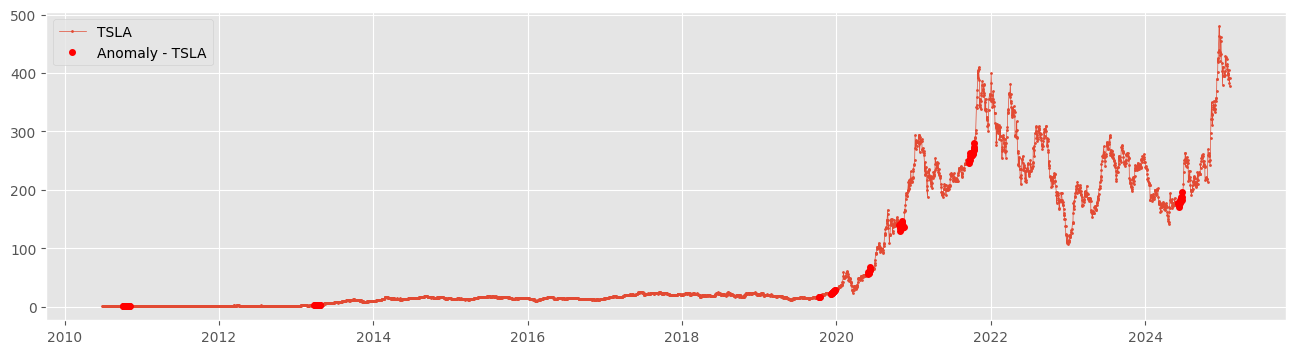

In [12]:

# ==================================
# 🔹 Volatility Shift Anomaly Detection (Yahoo Finance Data)
# ==================================
try:
    s_train = yf.download("TSLA")['Close']
    s_train = validate_series(s_train)

    volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
    anomalies = volatility_shift_ad.fit_detect(s_train)
    plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
    plt.show()
except Exception as e:
    print(f"Yahoo Finance Data Download Error: {e}")
